# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-12-16 12:13:08+01:00', end='2022-12-16 12:24:12+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2022-12-16 12:13:00+01:00'
tb = '2022-12-16 12:24:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity                power             frequency     voltage  \
type                            active   reactive                          
2022-12-16 12:13:00+01:00    18.632256  -7.274302  49.986130  244.780334   
2022-12-16 12:13:10+01:00    18.502048  -7.028095  49.989754  244.686523   
2022-12-16 12:13:20+01:00    18.865652  -6.936881  49.988747  244.745773   
2022-12-16 12:13:30+01:00   277.017426   1.997105  49.979958  244.284119   
2022-12-16 12:13:40+01:00  2041.270874  56.329815  49.972607  241.368286   
...                                ...        ...        ...         ...   
2022-12-16 12:23:20+01:00    80.264099  10.186366  49.986210  244.068298   
2022-12-16 12:23:30+01:00    78.180481  10.114264  49.995049  244.063187   
2022-12-16 12:23:40+01:00    31.968845  -2.548653  49.999382  244.214386   
2022-12-16 12:23:50+01:00    18.686518  -6.619919  49.990356  244.288345   
2022-12-16 12:24:00+01:00    18.541927  -6.402713  49.988075  244.198364   

physical_quantity                power        pf   current  
type                          apparent                      
2022-12-16 12:13:00+01:00    20.011032  0.646238  0.118147  
2022-12-16 12:13:10+01:00    19.796890  0.648521  0.116959  
2022-12-16 12:13:20+01:00    20.104239  0.646499  0.119574  
2022-12-16 12:13:30+01:00   278.247528  0.690405  1.222168  
2022-12-16 12:13:40+01:00  2042.048706  0.999444  8.461778  
...                                ...       ...       ...  
2022-12-16 12:23:20+01:00    80.909027  0.968467  0.339578  
2022-12-16 12:23:30+01:00    78.833176  0.969324  0.330478  
2022-12-16 12:23:40+01:00    32.890347  0.608015  0.196619  
2022-12-16 12:23:50+01:00    19.941679  0.584301  0.133400  
2022-12-16 12:24:00+01:00    19.670303  0.623658  0.128614  

[67 rows x 7 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2022-12-16 12:13:00+01:00'
tb = '2022-12-16 12:24:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity                power             frequency     voltage  \
type                            active   reactive                          
2022-12-16 12:13:00+01:00    18.743351  -7.319125  49.985802  244.737488   
2022-12-16 12:13:10+01:00    18.515900  -7.114996  49.986698  244.764999   
2022-12-16 12:13:20+01:00    19.722799  -7.417718  49.991901  244.761597   
2022-12-16 12:13:30+01:00    18.516500  -7.116228  49.985241  244.787598   
2022-12-16 12:13:40+01:00  2043.134033  55.381779  49.972660  241.398193   
...                                ...        ...        ...         ...   
2022-12-16 12:23:20+01:00    80.625717  10.394252  49.987701  244.089203   
2022-12-16 12:23:30+01:00    78.720718  10.352281  49.988880  244.078201   
2022-12-16 12:23:40+01:00    77.533363  10.014153  50.000198  244.041595   
2022-12-16 12:23:50+01:00    21.303600  -6.948186  49.994560  244.370605   
2022-12-16 12:24:00+01:00    18.617121  -6.568062  49.987862  244.156601   

physical_quantity                power        pf   current  
type                          apparent                      
2022-12-16 12:13:00+01:00    20.123219  0.670075  0.114266  
2022-12-16 12:13:10+01:00    19.838972  0.651217  0.116585  
2022-12-16 12:13:20+01:00    21.073271  0.627455  0.128763  
2022-12-16 12:13:30+01:00    19.849138  0.630491  0.120602  
2022-12-16 12:13:40+01:00  2043.883545  0.999392  8.468888  
...                                ...       ...       ...  
2022-12-16 12:23:20+01:00    81.293747  0.968096  0.341217  
2022-12-16 12:23:30+01:00    79.399223  0.971288  0.332064  
2022-12-16 12:23:40+01:00    78.178024  0.973629  0.326311  
2022-12-16 12:23:50+01:00    22.525476  0.581900  0.150459  
2022-12-16 12:24:00+01:00    19.746571  0.647192  0.117861  

[67 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

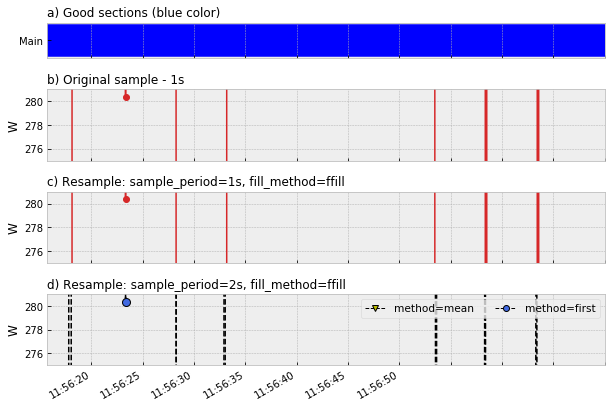

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-12-16 12:13:00+01:00'
tb = '2022-12-16 12:24:00+01:00'
#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|12:13:00 = 277 W", xy=('2022-12-16 12:13:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|12:13:00 = 277 W", xy=('2022-12-16 12:13:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [14]:
train = DataSet('dsual.h5')


train.set_window(start="2022-12-16 12:13:00", end="2022-12-16 12:20:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-12-16 12:13:08+01:00', end='2022-12-16 12:20:00+01:00', empty=False)

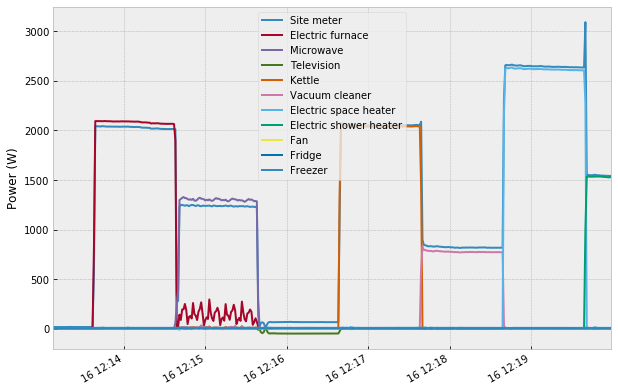

In [15]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [31]:
 #Validación 

valid = DataSet('dsual.h5')

valid.set_window(start="2022-12-16 12:20:00", end="2022-12-16 12:20:22")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-12-16 12:20:00+01:00', end='2022-12-16 12:20:22+01:00', empty=False)

In [32]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

ZeroDivisionError: integer division or modulo by zero

Pruebas

In [36]:
test = DataSet('dsual.h5') #Pruebas

test.set_window(start="2022-12-16 12:22:00", end="2022-12-16 12:24:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-12-16 12:22:00+01:00', end='2022-12-16 12:24:00+01:00', empty=False)

In [ ]:
test_elec.mains().plot()

ZeroDivisionError: integer division or modulo by zero